The Dataset is about Wisconsin Diagnostic Breast Cancer (WDBC).
Number of instances: 569 

Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

Attribute information

columns 3-32 
Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)
 Class distribution: 357 benign, 212 malignant

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing  import StandardScaler


pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [3]:
df.columns = ['ID number', 'Diagnosis','mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

In [5]:
df.head()

,ID number,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
Diagnosis_mapping = {'M':1, 'B':0}
df.Diagnosis = df.Diagnosis.map(Diagnosis_mapping)

In [5]:
df.drop('ID number', axis=1 , inplace=True)

In [6]:
df_wide = df[['Diagnosis','mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']]
df_long = pd.melt(df_wide, id_vars = 'Diagnosis')


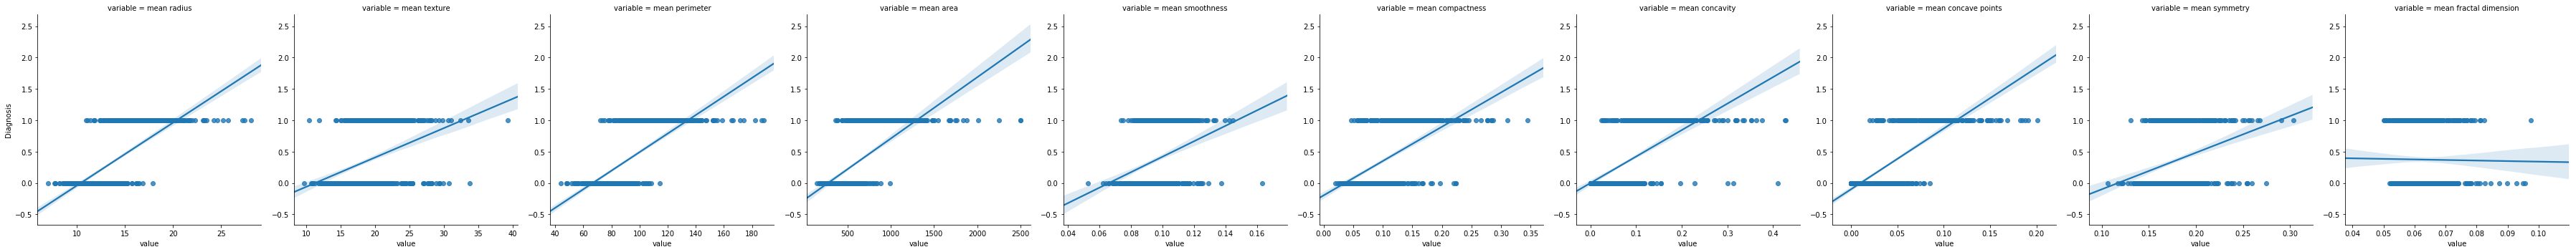

In [91]:
sns.lmplot(data = df_long, x ='value', y = 'Diagnosis', col=  'variable', sharex= False)
plt.show()

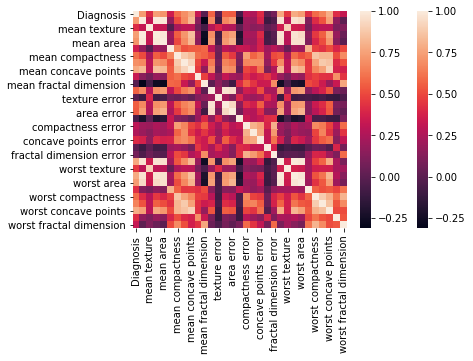

In [82]:
sns.heatmap(df.corr())
plt.show()

In [6]:
X = df.iloc[:, 1:]
Y = df['Diagnosis']

In [7]:
compare_df = pd.DataFrame(columns=[ 'Regular Logistic','Ridge','Lasso'])

#REGULAR LOGISTIC REGRESSION

#Set the C value verY high such that there is essentiallY no regularization taking place (C set to verY high value)
logreg = LogisticRegression(C = 1e9)
fit = logreg.fit(X, Y)
#RIDGE REGRESSION (L2)
ridge = LogisticRegressionCV(penalty='l2', solver = 'liblinear', cv = 10)
fit = ridge.fit(X, Y)
# LASSO REGRESSION(L1)
lasso = LogisticRegressionCV(penalty='l1', solver = 'liblinear', cv = 10)
fit = lasso.fit(X, Y)

'''new_row = pd.DataFrame([[ logreg.score(X, Y) , ridge.score(X, Y) , lasso.score(X, Y) ]] 
                       ,columns=[ 'Regular Logistic','Ridge','Lasso'])
compare_df = compare_df.append(new_row, ignore_index=True)'''
compare_df.loc[0, ['Regular Logistic']] = logreg.score(X, Y)
compare_df.loc[0, ['Ridge']] = ridge.score(X, Y)
compare_df.loc[0, ['Lasso']] = lasso.score(X, Y)
test_no = 1
kf = KFold(n_splits=10) 

for train_index, test_index in kf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    #Use model defined above
    logreg.fit(X_train, Y_train)
    score = logreg.score(X_test, Y_test)
    #all_log_score.append(score)  
    
    ridge.fit(X_train, Y_train)
    ridge_score = ridge.score(X_test, Y_test)
    #all_ridge_score.append(ridge_score)

    lasso.fit(X_train, Y_train)
    lasso_score = lasso.score(X_test, Y_test)
    #all_lasso_score.append(lasso_score)
    compare_df.loc[test_no, ['Regular Logistic']] = score
    compare_df.loc[test_no, ['Ridge']] = ridge_score
    compare_df.loc[test_no, ['Lasso']] = lasso_score
    
    
    test_no = test_no + 1

#new_row = pd.DataFrame([[ score.mean() , ridge_score.mean() , lasso_score.mean() ]],columns=[ 'Regular Logistic','Ridge','Lasso'])
#compare_df = compare_df.append(new_row, ignore_index=True)
compare_df.loc[test_no, ['Regular Logistic']] = score.mean()
compare_df.loc[test_no, ['Ridge']] = ridge_score.mean()
compare_df.loc[test_no, ['Lasso']] = lasso_score.mean()

#Store the parameter estimates.
origparams = np.append(logreg.coef_, logreg.intercept_)
ridge_params = np.append(ridge.coef_, ridge.intercept_)
lasso_params = np.append(lasso.coef_, lasso.intercept_)
print(list(zip(X_train.columns, lasso.coef_ )))

[('mean radius', array([ -9.57191051e-01,   1.42579762e-01,  -1.18793217e-01,
         7.33567757e-03,   0.00000000e+00,   0.00000000e+00,
         6.72117597e+00,   2.30809129e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -1.98794161e+00,
         6.45938769e-01,   1.07033785e-01,   0.00000000e+00,
        -5.82455432e-01,  -1.28232466e+01,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   5.50578906e-03,
         3.36500562e-01,  -2.65592254e-02,   1.98869476e-02,
         3.39191471e+01,  -5.39686426e+00,   3.20749564e+00,
         4.18528259e+01,   1.00228118e+01,   0.00000000e+00]))]


In [14]:
#print(X_train.columns.tolist())
print(lasso.coef_)

[[ -9.88235725e-01   2.32193876e-01  -1.30541593e-01   4.18585668e-04
    0.00000000e+00  -3.88224307e+01   1.67885510e+01   8.35082864e+01
   -1.42049171e+01   0.00000000e+00   3.80292782e+00  -1.59856300e+00
   -5.61407127e-02   1.45882721e-01   0.00000000e+00  -2.31995915e+01
   -3.65079313e+01   6.49236040e+01  -2.19481936e+01   0.00000000e+00
   -3.61514558e-02   3.13656916e-01   1.28970050e-02   2.29957290e-02
    4.24731430e+01  -2.97702616e+00   7.64565114e+00   3.60107935e+01
    2.07335555e+01   0.00000000e+00]]


In [15]:
flat_list = [item for sublist in lasso.coef_ for item in sublist]
print(flat_list)

[-0.9882357251084174, 0.23219387647380504, -0.13054159283079134, 0.00041858566784010604, 0.0, -38.822430717173994, 16.78855097812092, 83.508286370816151, -14.204917136968245, 0.0, 3.8029278170545751, -1.5985629962699388, -0.056140712713792354, 0.1458827208126684, 0.0, -23.199591470489825, -36.507931318841045, 64.923603980177063, -21.948193556125833, 0.0, -0.036151455803256231, 0.31365691551608249, 0.012897004974137564, 0.022995729047196184, 42.473143027241036, -2.9770261613344173, 7.6456511406428334, 36.010793455148608, 20.733555540787918, 0.0]


In [17]:
print( list(zip(X_train.columns, flat_list)))

[('mean radius', -0.9882357251084174), ('mean texture', 0.23219387647380504), ('mean perimeter', -0.13054159283079134), ('mean area', 0.00041858566784010604), ('mean smoothness', 0.0), ('mean compactness', -38.822430717173994), ('mean concavity', 16.78855097812092), ('mean concave points', 83.508286370816151), ('mean symmetry', -14.204917136968245), ('mean fractal dimension', 0.0), ('radius error', 3.8029278170545751), ('texture error', -1.5985629962699388), ('perimeter error', -0.056140712713792354), ('area error', 0.1458827208126684), ('smoothness error', 0.0), ('compactness error', -23.199591470489825), ('concavity error', -36.507931318841045), ('concave points error', 64.923603980177063), ('symmetry error', -21.948193556125833), ('fractal dimension error', 0.0), ('worst radius', -0.036151455803256231), ('worst texture', 0.31365691551608249), ('worst perimeter', 0.012897004974137564), ('worst area', 0.022995729047196184), ('worst smoothness', 42.473143027241036), ('worst compactness


# Is there a better way to store the different model results and compare? 


# is it not necessary to standardize the values and then do modelling? or check the 4 assumptions of linear model?


In [56]:
new_index=  {0: 'overall',  1:'fold 1', 2:'fold 2', 3:'fold 3', 4:'fold 4',5:'fold 5',
             6:'fold 6',7:'fold 7',8:'fold 8',9:'fold 9',10:'fold 10',11:'Average Score'}
compare_df.rename(index = new_index, inplace=True)

In [57]:
compare_df

,Regular Logistic,Ridge,Lasso
overall,0.970123,0.964851,0.989455
fold 1,0.947368,0.947368,0.947368
fold 2,0.912281,0.912281,0.947368
fold 3,0.964912,0.947368,0.982456
fold 4,0.964912,0.982456,0.877193
fold 5,0.964912,0.982456,0.964912
fold 6,0.964912,0.964912,0.964912
fold 7,0.982456,0.982456,1.000000
fold 8,0.947368,0.947368,0.964912
fold 9,0.947368,0.947368,0.964912


I have chosen to use the LogisiticRegressionCV function because it has a built-in solver that finds the optimal C-value to use for the regularization parameter. The accuracy score for Lasso regression was better than other two.


In [60]:
print('Logostic Regression parameters:\n',origparams)
print('\nRidge Regression parameters:\n',ridge_params)
print('\nLasso Regression parameters:\n', lasso_params)

Logostic Regression parameters:
 [ -7.45059971e+00   1.29311125e-02   4.60477743e-01   3.75718158e-02
   3.75335617e+00   9.57719271e-02   3.50809576e+00   6.56295943e+00
   4.48368217e+00  -6.23852196e-01   4.82833173e-02  -2.61255625e+00
   9.89286113e-01   6.76389975e-02   6.81076283e-01  -5.44810405e+00
  -6.59669445e+00   6.07172314e-01  -5.04425016e-01  -9.68869497e-01
   1.92757037e+00   4.25099645e-01  -9.85249939e-02   5.59118719e-03
   8.44977551e+00  -1.92243629e+00   3.27428097e+00   1.32886901e+01
   8.23794341e+00  -6.64520012e-01  -5.82476400e+00]

Ridge Regression parameters:
 [ -7.36349931e+00   1.20925378e-01   3.43597790e-01   4.21299753e-02
   3.58815707e+00   1.29503130e-01   3.34061086e+00   6.28532306e+00
   4.33567433e+00  -5.98977383e-01   4.23987124e-02  -1.16359581e+00
   3.22994211e-01   7.97586069e-02   6.54601510e-01  -5.19278380e+00
  -6.34254033e+00   5.77655558e-01  -4.55230722e-01  -9.21468560e-01
   2.09854294e+00   2.59157772e-01   5.75531484e-03  -6

In [70]:
len(lasso_params[lasso_params !=0])

27

We see here the Lasso regression considered only 27 features from 31 features.

Strenths and limitations:

Ridge regression keeps all predictor variables. Good if you they're all relevant for predicting target variable. Otherwise, makes model more complicated than it needs to be.
LASSO regression performs feature selection, which reduces model complexity. Undesireable if you want to keep all features in model.

In [16]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df), columns= df.columns)

X = df_std.iloc[:, 1:]
Y = df['Diagnosis']

In [17]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

In [18]:
compare_df_2 = pd.DataFrame(columns=[ 'Regular Logistic','Ridge','Lasso'])

#REGULAR LOGISTIC REGRESSION
logreg = LogisticRegression(C = 1e9)
fit = logreg.fit(X, Y)
#RIDGE REGRESSION (L2)
ridge = LogisticRegressionCV(penalty='l2', solver = 'liblinear', cv = 10)
fit = ridge.fit(X, Y)
# LASSO REGRESSION(L1)
lasso = LogisticRegressionCV(penalty='l1', solver = 'liblinear', cv = 10)
fit = lasso.fit(X, Y)

compare_df_2.loc[0, ['Regular Logistic']] = logreg.score(X, Y)
compare_df_2.loc[0, ['Ridge']] = ridge.score(X, Y)
compare_df_2.loc[0, ['Lasso']] = lasso.score(X, Y)
test_no = 1
kf = KFold(n_splits=10) 

for train_index, test_index in kf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    #Use model defined above
    logreg.fit(X_train, Y_train)
    score = logreg.score(X_test, Y_test)

    
    ridge.fit(X_train, Y_train)
    ridge_score = ridge.score(X_test, Y_test)


    lasso.fit(X_train, Y_train)
    lasso_score = lasso.score(X_test, Y_test)

    compare_df_2.loc[test_no, ['Regular Logistic']] = score
    compare_df_2.loc[test_no, ['Ridge']] = ridge_score
    compare_df_2.loc[test_no, ['Lasso']] = lasso_score
    
    
    test_no = test_no + 1


compare_df_2.loc[test_no, ['Regular Logistic']] = score.mean()
compare_df_2.loc[test_no, ['Ridge']] = ridge_score.mean()
compare_df_2.loc[test_no, ['Lasso']] = lasso_score.mean()

#Store the parameter estimates.
origparams = np.append(logreg.coef_, logreg.intercept_)
ridge_params = np.append(ridge.coef_, ridge.intercept_)
lasso_params = np.append(lasso.coef_, lasso.intercept_)


[('mean radius', array([ 0.        ,  0.62830616,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.22307149,  0.        ,  0.        ,
        1.45194904,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.16907869,
        1.65235501,  0.63608954,  0.        ,  2.2578272 ,  0.75509842,
        0.        ,  0.08946649,  1.39256489,  0.43537044,  0.        ]))]


In [19]:
compare_df_2

,Regular Logistic,Ridge,Lasso
0,0.998243,0.984183,0.98594
1,0.964912,0.947368,0.947368
2,0.894737,0.982456,0.947368
3,0.982456,0.982456,0.982456
4,0.894737,0.929825,0.964912
5,0.912281,0.964912,0.964912
6,0.929825,0.982456,0.982456
7,0.982456,1,0.982456
8,0.947368,0.982456,0.982456
9,1,1,0.982456


In [22]:
lasso_params

array([ 0.        ,  0.62830616,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.22307149,  0.        ,  0.        ,
        1.45194904,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.16907869,
        1.65235501,  0.63608954,  0.        ,  2.2578272 ,  0.75509842,
        0.        ,  0.08946649,  1.39256489,  0.43537044,  0.        ,  0.        ])

In [20]:
len(lasso_params[lasso_params !=0])

11

When Tried the similar after standardizing the features, The Logistic Regression and Lasso Regression performed similar.
We see here the Lasso regression considered only 11 features from 31 features. It considered 27 Features before standardization.

# IS IT OK?
# How can it reduce so many features after standardization ?
# IS it wrong to standardize for Lasso regression?